<center><h1>Universidad Politecnica Salesiana</h1></center>
<center><h2>Prueba 1 Practica de Simulacion</h2></center>
<center><h3>Jonnathan Uzhca</h3></center>


Objetivo:

- Consolidar los conocimientos adquiridos en clase para desarrollar simulaciones.

Enunciado:

- Diseñe y desarrolle un modelo y/o script que permita simular el siguiente caso real:
- Investigar los datos de los paises contigados por COVID-19, especialmente de latinoamerica (menos Ecuador), deberán escoger uno y que no se repita, para ello se va a seleccionar el orden en el que publique dentro del foro “Tema prueba 1”, con estos datos obtener los siguientes modelos:
- Generar un modelo matematico de prediccion para regresion lineal, exponencial, polinomico y logaritmico, de los nuevos contactos en la proxima semana (7 dias despues).
- Generar un modelo probabilistico con los datos.
- Finalmente, contrarestar los modelos matematicos y generar las siguientes conclusiones
- Cual tiene una mejor prediccion
- Ventajas y desventajas de los modelos.
- Cual es el principal problema del modelo probabilistico
- El proceso de simulación desarrollado deberá considerar los siguientes aspectos:
- Se debe establecer un modelo basado en modelos matematicos y probabilisticos.
- El programa deberá generar gráficas que indiquen la ecuacion matematica y probabilistica de tendencias.
- Deben calcularse las siguientes métricas:
- Total de infectados dentro de 7 dias (matematico y probabilistico).


Finalmente, desarrollar dentor de un cuaderno de Jupyter Notebook, generar un PDF y subir al repositorio.

La fecha de entrega es 24/11/20 antes o igual de las 13:00.

Cualquier pregunta que tengan no olviden en realizar por cualquier medio electronico.





##  Paso 1

Primero vamos a exportar todo los paquetes que vamsoa  necesitar

In [2]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from scipy.optimize import curve_fit
from numpy import poly1d,polyfit  
from sklearn.model_selection import train_test_split
from scipy.integrate import solve_ivp
from scipy.optimize import minimize
import math
import statistics
from scipy.integrate import odeint
from random import randrange # Obtener un numero randomico
import pygame

pygame 2.0.0 (SDL 2.0.12, python 3.8.5)
Hello from the pygame community. https://www.pygame.org/contribute.html


## Paso 2

Vamos a seleccionar un pais de latinoamerica que no se repita el mismo pais con mis compañeros el cual todos los pais estan ya designado, vamos a  cojer un pais europeo que es francia

vamos a leer nuestro corpus a ver que esta en formato  cvs cargamos nuestro set de datos de nuestro  CORPUS

In [17]:
data = pd.read_csv('time-series-19-covid-combined_csv.csv')
data.shape

(82314, 6)

## Paso 3

vamos a ver como estas nuestro  corpus como estas  estructurado

In [18]:
data.head()

,Date,Country/Region,Province/State,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,NaN,0,0.0,0
1,2020-01-23,Afghanistan,NaN,0,0.0,0
2,2020-01-24,Afghanistan,NaN,0,0.0,0
3,2020-01-25,Afghanistan,NaN,0,0.0,0
4,2020-01-26,Afghanistan,NaN,0,0.0,0


## Paso 4

Vamos a seleccionar nuestro pais seleccionada que es fracia y visualizar los los datos como estas 

In [19]:
data = data[data['Country/Region'].isin(['France'])]
data.head()

,Date,Country/Region,Province/State,Confirmed,Recovered,Deaths
35496,2020-01-22,France,French Guiana,0,0.0,0
35497,2020-01-23,France,French Guiana,0,0.0,0
35498,2020-01-24,France,French Guiana,0,0.0,0
35499,2020-01-25,France,French Guiana,0,0.0,0
35500,2020-01-26,France,French Guiana,0,0.0,0


## Paso 5 

Vamos a visualizar los datos mediante una grafica donde nos muestra como a hido incrementando los infectados

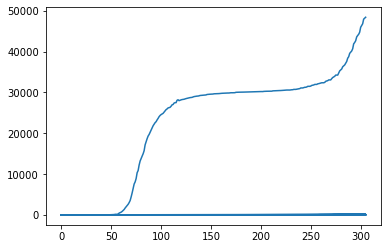

In [20]:
infectados = list(data.iloc[:, 5])
formatoFecha = '%Y-%m-%d'
fecha = data['Date']
data['Date'] = fecha.map(lambda x: (datetime.strptime(x, formatoFecha) - datetime.strptime('2020-01-22', formatoFecha)).days)
dias = list(data['Date'])
plt.plot(dias, infectados)

In [21]:
data.describe()

,Date,Confirmed,Recovered,Deaths
count,3366.000000,3.366000e+03,3366.000000,3366.000000
mean,152.500000,3.371225e+04,5741.824421,2089.846108
std,88.347244,1.800635e+05,18887.939302,7768.329601
min,0.000000,0.000000e+00,0.000000,0.000000
25%,76.000000,6.000000e+00,1.000000,0.000000
50%,152.500000,8.300000e+01,55.500000,1.000000
75%,229.000000,1.851000e+03,631.000000,16.000000
max,305.000000,2.140829e+06,129722.000000,48398.000000


## Paso 6

Vamosa  ver como esta  los variables que vamos  a predecir  como estan reflejadas

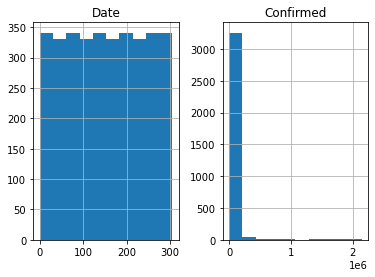

In [27]:
data.drop(['Country/Region','Province/State','Recovered', 'Deaths'],1).hist()
plt.show()

## Regrecion Lineal

Vamos a  realizar la regrescion ineal lo cual vamos a crearnos nuestra regescion lineal y vamso a ver  como esta a fectando  los contagion en 7 dias

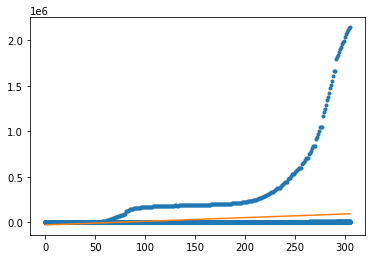

In [63]:
lineal = linear_model.LinearRegression()
lineal.fit(np.array(data['Date']).reshape(-1,1), data['Confirmed'])
plt.plot(data['Date'], data['Confirmed'], '.')
plt.plot(data['Date'], lineal.predict(np.array(data['Date']).reshape(-1, 1)))
con = 1
for i in range(326, 333):
    prediccion = lineal.predict([[i]])
    con += 1

## Regrecion Exponencial

Como  bien  hemos venido  viendo  las regrescion lineal vamos a  elevorar un  medoto donde nos de nuestra regrecion lineal  y conparar nuestros datos  a ver si tenesmo una mejor  disponibildad  de datos  y ver como afecta a los infectados en 7 dias

7 dias de infeccion :  [  8132.9584435    8134.47856342   8136.04027206 ... 206045.79995924
 211461.98683855 217026.35433533]


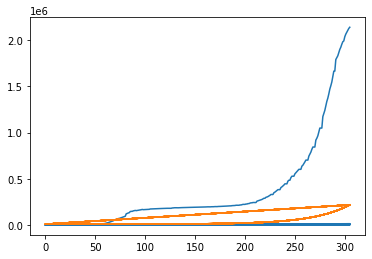

In [86]:
def exponencial(x, c0, c1, c2, c3):
    return c0 * np.exp(-c1 * x) + c2 + c3
g = [100, 0.0001, 200, 0.0001]
y = np.empty(len(data['Date']))
for i in range(len(data['Date'])):
    y[i] = exponencial(dias[i], g[0], g[1], g[2], g[3])
popt, pcov = curve_fit(exponencial, data['Date'], data['Confirmed'], g)
for i in range(len(data['Date'])):
    y[i] = exponencial(dias[i], popt[0], popt[1], popt[2], popt[3])
print('7 dias de infeccion : ',y)
plt.plot(data['Date'], data['Confirmed'])
plt.plot(data['Date'], y)

## Regresion Polinomial

La Regresión Polinomial es un caso especial de la Regresión Lineal, extiende el modelo lineal al agregar predictores adicionales, obtenidos al elevar cada uno de los predictores originales a una potencia. Por ejemplo, una regresión cúbica utiliza tres variables, como predictores. Este enfoque proporciona una forma sencilla de proporcionar un ajuste no lineal a los datos.

El método estándar para extender la Regresión Lineal a una relación no lineal entre las variables dependientes e independientes, ha sido reemplazar el modelo lineal con una función polinomial.

De manera que vamos a  ver si podemos  ver si esta regrecion es mejor que la regrescion lineal o no nos ayuda en nada

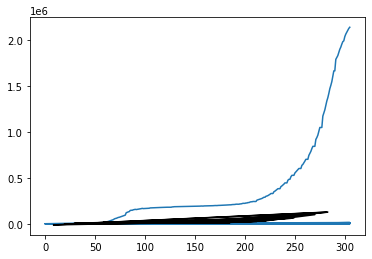

In [100]:
plt.plot(data['Date'], data['Confirmed'])
p = poly1d(polyfit(data['Date'], data['Confirmed'], deg=4))
Xtrain, Xtest, y_train, y_test = train_test_split(data['Date'], data['Confirmed'], test_size=0.01)
poli_reg = PolynomialFeatures(degree = 3)
X_train = poli_reg.fit_transform(np.array(Xtrain).reshape(-1,1))
X_test = poli_reg.fit_transform(np.array(Xtest).reshape(-1,1))
pr = linear_model.LinearRegression()
pr.fit(X_train, y_train)
Y_pred_pr = pr.predict(X_test)
plt.plot(Xtest, Y_pred_pr, color='black')

## Conclucion

Como conclucion podemos decir que las regresion  que hemos resuelta con nuestro corpus de datos que hemos seleccionado podemos ver una gran desvarianza de valores lo cual podemos decir que el mejor metodo  para resolver es el metodo de poliminial ya que podemos verificar una  que sus punto de interceccion va cambiando y  aumentandoy se va adaptando a los datos obtenidos de mejor manera.